In [12]:
import math
from math import*
math.pi
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
import numpy as np
import pandas as pd
from matplotlib.widgets import Cursor

In [67]:
#input data

tc=[ 3.22,2.64,3.10,4.27,3.72,3.29,2.88,0.33,2.25,2.80,2.79,3.38,4.12,0.28,0.51,2.89,0.35,0.38,0.37,1.26,0.97,0.32,0.32,2.98,3.71]
td=[ 2.078,1.643,2.258,2.641,2.961,2.651,1.729,0.335,1.137,1.671,2.629,2.098,2.814,0.439,0.474,2.12,0.294,0.492,0.428,0.691,0.827,0.337,0.354,1.221,1.689]
phi=[ 2.38,2.51,1.97,3.14,3.47,2.58,5.27,8.04,4.45,7.08,12.98,7.26,3.70,8.60,8.70,5.64,7.03,6.28,2.83,7.82,6.60,8.09,9.21,5.32,4.69]
Vp=[5207,5250,4884,5081,4286,5040,2039,np.NaN,5526,4884,4315,4065,1145,560,375,5081,np.NaN,952,1202,1073,3706,942,730,5207,4846]
Vs=[2490,2800,2423,2658,2386,2530,1335,np.NaN,2788,2692,2692,1969,np.NaN,np.NaN,np.NaN,2593,np.NaN,502,np.NaN,568,1707,510,np.NaN,2658,2520]


rho=[2.66,2.65,2.63,2.60,2.60,2.64,2.57,1.22,2.79,3.02,2.53,2.59,2.61,1.25,1.39,1.28,1.29,1.39,1.22,1.80,1.71,1.38,1.31,2.08,2.55]

lithology=['Claystone',
'Shale',
'Conglomerate',
'Sandstone',
'Sandstone',
'Claystone',
'Shale',
'Coal',
'Shale',
'Shale',
'Claystone',
'Conglomerate',
'Conglomerate',
'Coal',
'Coal',
'Shale',
'Coal',
'Coal','Coal',
'Claystone',
'Coal',
'Coal',
'Coal',
'Claystone',
'Sandstone']

#df['Vs'] = Vs

#classification by facies

TC_coal=df['tc'].loc[df['lithology'] == 'Coal']
TC_Shale=df['tc'].loc[df['lithology'] == 'Shale']
TC_Claystone=df['tc'].loc[df['lithology'] == 'Claystone']
TC_Conglomerate=df['tc'].loc[df['lithology'] == 'Conglomerate']
TC_Sandstone=df['tc'].loc[df['lithology'] == 'Sandstone']


PHI_coal=df['phi'].loc[df['lithology'] == 'Coal']
PHI_Shale=df['phi'].loc[df['lithology'] == 'Shale']
PHI_Claystone=df['phi'].loc[df['lithology'] == 'Claystone']
PHI_Conglomerate=df['phi'].loc[df['lithology'] == 'Conglomerate']
PHI_Sandstone=df['phi'].loc[df['lithology'] == 'Sandstone']

df




,tc,td,phi,lithology,d_tc,tc_pred,rho,Cp,rho_calculated,Vp,Vs,Ro_Cp
0,3.22,2.078,2.38,Claystone,4.00,7.22,2.66,0.582544,2.66,5207.0,2490.0,1.549567
1,2.64,1.643,2.51,Shale,4.54,7.18,2.65,0.606346,2.65,5250.0,2800.0,1.606817
2,3.10,2.258,1.97,Conglomerate,4.19,7.29,2.63,0.522014,2.63,4884.0,2423.0,1.372896
3,4.27,2.641,3.14,Sandstone,2.80,7.07,2.60,0.621851,2.60,5081.0,2658.0,1.616812
4,3.72,2.961,3.47,Sandstone,3.25,6.97,2.60,0.483205,2.60,4286.0,2386.0,1.256332
5,3.29,2.651,2.58,Claystone,3.88,7.17,2.64,0.470091,2.64,5040.0,2530.0,1.241041
6,2.88,1.729,5.27,Shale,3.72,6.60,2.57,0.648133,2.57,2039.0,1335.0,1.665703
7,0.33,0.335,8.04,Coal,5.81,6.14,1.22,0.807438,1.22,NaN,NaN,0.985075
8,2.25,1.137,4.45,Shale,4.51,6.76,2.79,0.709280,2.79,5526.0,2788.0,1.978892
9,2.80,1.671,7.08,Shale,3.50,6.30,3.02,0.554849,3.02,4884.0,2692.0,1.675643


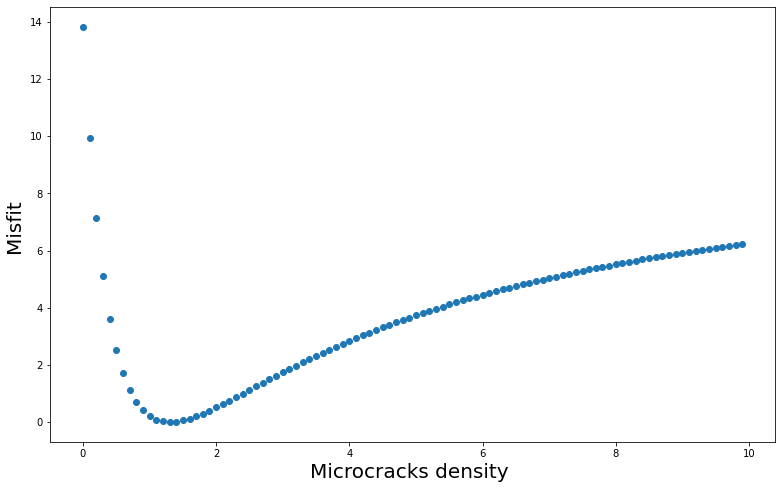

In [5]:
#Microcks density calculation


### Inversion to find the crack density 
C_quartz=7.7 #Thermal conductivity (TC) of quartz 
С_K_feldspar=2.44
C_Na_plagioclase=2.37
C_Calcite=3.65
C_Dolomite=5.97
C_Chlorite=1.38



rho=np.arange(start=0,stop=10,step=0.1) #crack density
C_meas=3.2#TC measured 
phi=0.07 # porosity
aspect=0.001 # aspect ratio 
misfit_C=np.zeros(shape=(len(rho)))


for j,rho_value in enumerate(rho):
        
        C_pred=C_quartz/(1+(phi/(1-phi))*((3/2)+(4/9)*rho_value*((2+phi)/phi)*((4+3*pi*aspect)/(4-pi*aspect)))) # equation B36 articl L.Pimienta 2014
        misfit_C[j]=(C_pred-C_meas)**2
       

fig, ax = plt.subplots(figsize=(13,8))

plt.scatter(rho,misfit_C)

plt.xlabel("Microcracks density ",fontsize=20 ) 
plt.ylabel("Misfit ",fontsize=20)
plt.show() 


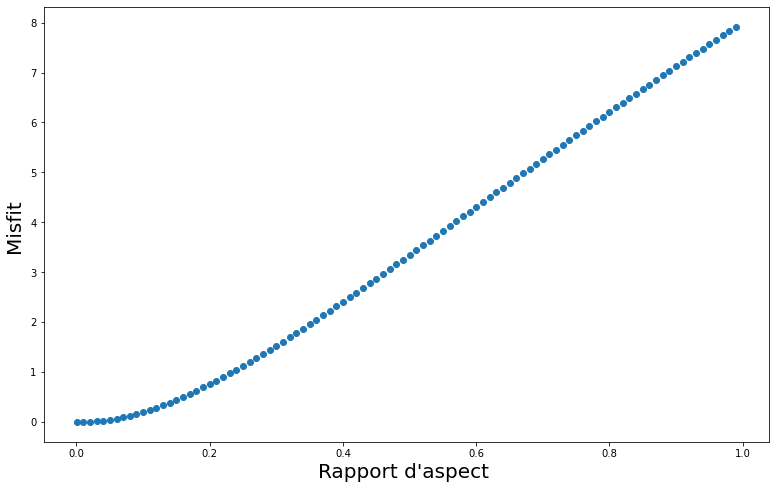

In [8]:
#aspect ratio calculation

aspect=np.arange(start=0.0001,stop=1,step=0.01) #aspect ratio 
rho=1.27
phi=0.07
C_pred=np.zeros(shape=(len(aspect)))
misfit_C=np.zeros(shape=(len(aspect)))

for k,aspect_value in enumerate(aspect):
        
    C_pred=C_quartz/(1+(phi/(1-phi))*((3/2)+(4/9)*rho*((2+phi)/phi)*((4+3*pi*aspect_value)/(4-pi*aspect_value)))) 
    misfit_C[k]=(C_pred-C_meas)**2
    
fig, ax = plt.subplots(figsize=(13,8))
plt.scatter(aspect,misfit_C)
plt.xlabel("Rapport d'aspect ",fontsize=20 ) 
plt.ylabel("Misfit ",fontsize=20)
plt.show() 

In [28]:
#Euken-Maxwell
p= np.arange(start=0,stop=1,step=0.05)
alpha=0.00311 #=TC_fluid/C_matrice here fluid air C_air 0.024

L=[]
for x in p:
    l=C_quartz*((2*alpha+1+x*(alpha-1))/((2*alpha+1)-2*x*(alpha-1)))
    L.append(l)
    
#Modèle moyenne géométrique 
C_air=0.024
G=[]
for y in p:
    g=(C_quartz**(1-y))*(C_air)**y
    G.append(g)
    
#K_feldspar
p= np.arange(start=0,stop=1,step=0.05)
alpha=0.00311 #=TC_fluid/C_matrice here fluid air C_air 0.024

F=[]
for x in p:
    f=С_K_feldspar*((2*alpha+1+x*(alpha-1))/((2*alpha+1)-2*x*(alpha-1)))
    F.append(f)
    
#Na_plagioclase
p= np.arange(start=0,stop=1,step=0.05)
alpha=0.00311 #=TC_fluid/C_matrice here fluid air C_air 0.024

P=[]
for x in p:
    p=C_Na_plagioclase*((2*alpha+1+x*(alpha-1))/((2*alpha+1)-2*x*(alpha-1)))
    P.append(p)
    
#Calcite
p= np.arange(start=0,stop=1,step=0.05)
alpha=0.00311 #=TC_fluid/C_matrice here fluid air C_air 0.024

C=[]
for x in p:
    c=C_Calcite*((2*alpha+1+x*(alpha-1))/((2*alpha+1)-2*x*(alpha-1)))
    C.append(c)
    
#Dolomite
p= np.arange(start=0,stop=1,step=0.05)
alpha=0.00311 #=TC_fluid/C_matrice here fluid air C_air 0.024

D=[]
for x in p:
    d=C_Dolomite*((2*alpha+1+x*(alpha-1))/((2*alpha+1)-2*x*(alpha-1)))
    D.append(d)
    
#Chlorite
p= np.arange(start=0,stop=1,step=0.05)
alpha=0.00311 #=TC_fluid/C_matrice here fluid air C_air 0.024

H=[]
for x in p:
    h=C_Chlorite*((2*alpha+1+x*(alpha-1))/((2*alpha+1)-2*x*(alpha-1)))
    H.append(h)
    
#Orthoclas
p= np.arange(start=0,stop=1,step=0.05)
alpha=0.00311 #=TC_fluid/C_matrice here fluid air C_air 0.024

D=[]
for x in p:
    d=C_Dolomite*((2*alpha+1+x*(alpha-1))/((2*alpha+1)-2*x*(alpha-1)))
    D.append(d)

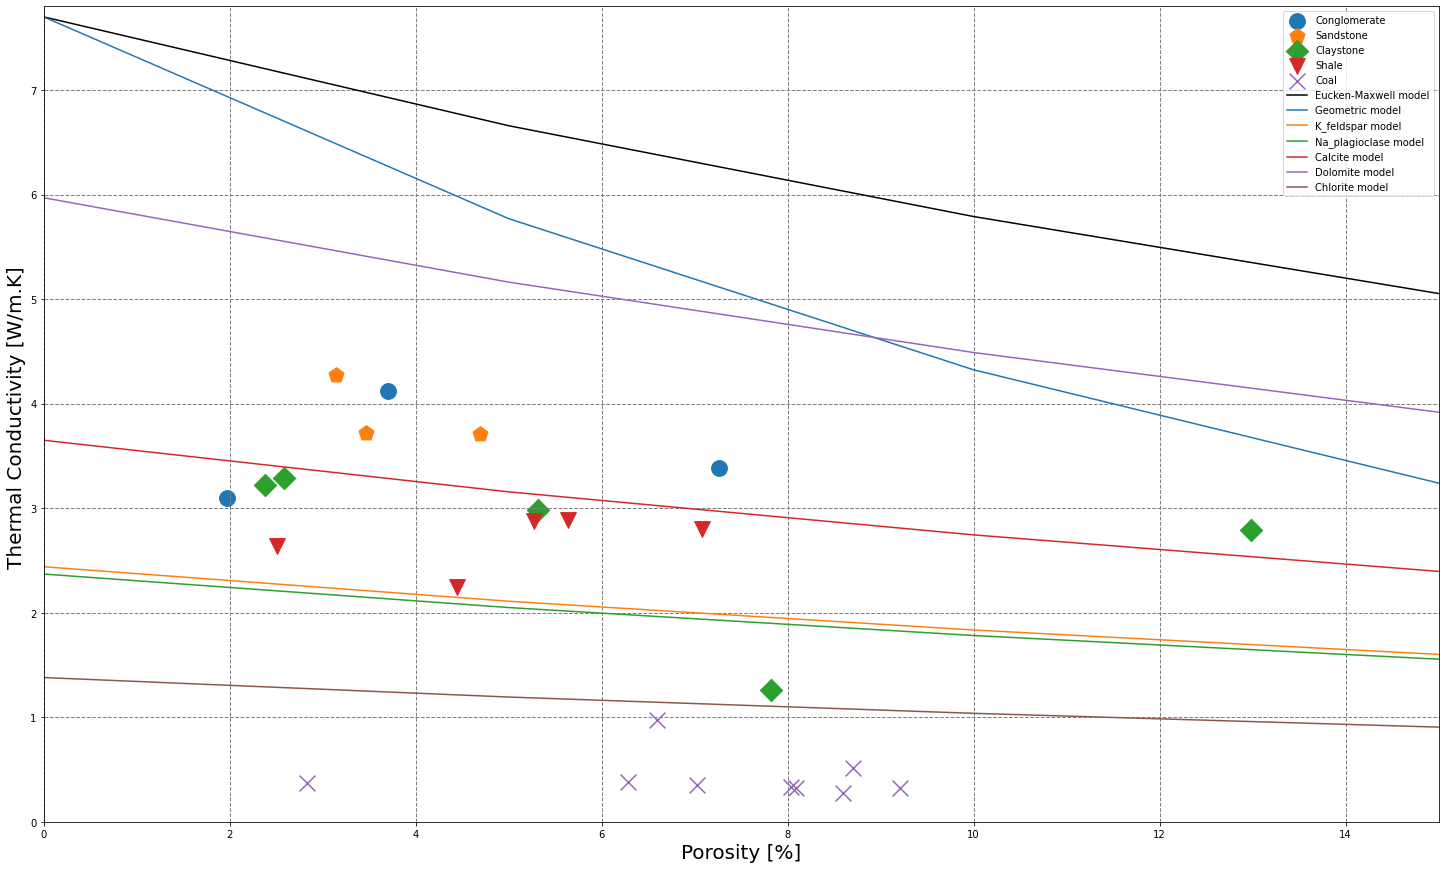

In [30]:
#Arti's plot for TC


plt.figure(figsize=(25, 15))
poro=np.arange(start=0,stop=100,step=5)



plt.scatter(PHI_Conglomerate,TC_Conglomerate,marker="o",label='Conglomerate', s=250)
plt.scatter(PHI_Sandstone,TC_Sandstone,marker="p",label='Sandstone', s=250)
plt.scatter(PHI_Claystone,TC_Claystone,marker="D",label='Claystone', s=250)
plt.scatter(PHI_Shale,TC_Shale,marker="v",label='Shale', s=250)
plt.scatter(PHI_coal,TC_coal,marker="x",label='Coal', s=250)

plt.plot(poro,L,label='Eucken-Maxwell model',color='k')
plt.plot(poro,G,label='Geometric model')
plt.plot(poro,F,label='K_feldspar model')
plt.plot(poro,P,label='Na_plagioclase model')
plt.plot(poro,C,label='Calcite model')
plt.plot(poro,D,label='Dolomite model')
plt.plot(poro,H,label='Chlorite model')



plt.xlim([0,15])
plt.ylim(0,7.8)
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)
plt.ylabel("Thermal Conductivity [W/m.K] ",fontsize=20)
plt.xlabel("Porosity [%]",fontsize=20) 
plt.legend()

In [35]:
#Delta TC

tc_pred=[7.22,7.18, 7.29, 7.07, 6.97,7.17,6.6,6.14,6.76,6.3,5.31,6.26,6.93,6.03,6.02,6.55,6.32,6.44,7.12,6.17,6.38,6.12,5.92,6.61,6.71]
d_tc=np.subtract(tc_pred,tc)
#df['tc_pred'] = tc_pred
df

,tc,td,phi,lithology,d_tc,tc_pred
0,3.22,2.078,2.38,Claystone,4.00,7.22
1,2.64,1.643,2.51,Shale,4.54,7.18
2,3.10,2.258,1.97,Conglomerate,4.19,7.29
3,4.27,2.641,3.14,Sandstone,2.80,7.07
4,3.72,2.961,3.47,Sandstone,3.25,6.97
5,3.29,2.651,2.58,Claystone,3.88,7.17
6,2.88,1.729,5.27,Shale,3.72,6.60
7,0.33,0.335,8.04,Coal,5.81,6.14
8,2.25,1.137,4.45,Shale,4.51,6.76
9,2.80,1.671,7.08,Shale,3.50,6.30


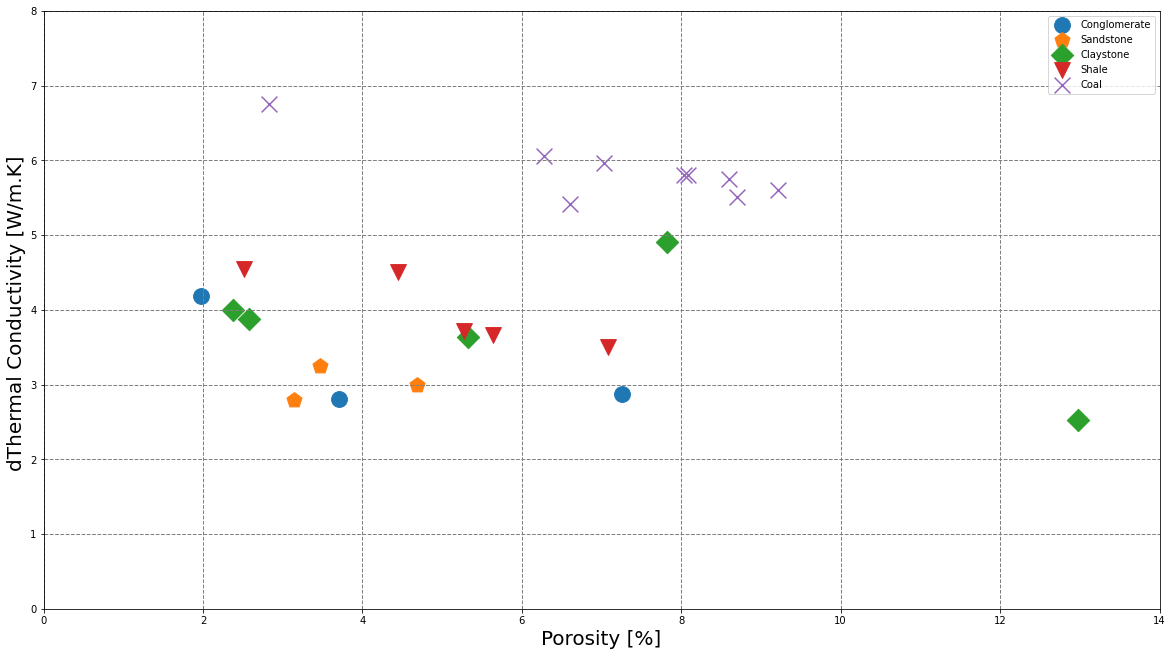

In [36]:
#Delta TC plot

dTC_coal=df['d_tc'].loc[df['lithology'] == 'Coal']
dTC_Shale=df['d_tc'].loc[df['lithology'] == 'Shale']
dTC_Claystone=df['d_tc'].loc[df['lithology'] == 'Claystone']
dTC_Conglomerate=df['d_tc'].loc[df['lithology'] == 'Conglomerate']
dTC_Sandstone=df['d_tc'].loc[df['lithology'] == 'Sandstone']


plt.figure(figsize=(20, 11))
poro=np.arange(start=0,stop=100,step=5)

plt.scatter(PHI_Conglomerate,dTC_Conglomerate,marker="o",label='Conglomerate', s=250)
plt.scatter(PHI_Sandstone,dTC_Sandstone,marker="p",label='Sandstone', s=250)
plt.scatter(PHI_Claystone,dTC_Claystone,marker="D",label='Claystone', s=250)
plt.scatter(PHI_Shale,dTC_Shale,marker="v",label='Shale', s=250)
plt.scatter(PHI_coal,dTC_coal,marker="x",label='Coal', s=250)





plt.xlim([0,14])
plt.ylim(0,8)
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)
plt.ylabel("dThermal Conductivity [W/m.K] ",fontsize=20)
plt.xlabel("Porosity [%]",fontsize=20) 
plt.legend()


In [31]:
#TD

In [43]:
#Cp and rho calculation

Cp=df['tc']/(df['td']*df['rho'])
rho_calculated=df['tc']/(df['Cp']*df['td'])
Ro_Cp=df['tc']/df['td']
#df['Ro_Cp']=Ro_Cp
df

,tc,td,phi,lithology,d_tc,tc_pred,rho,Cp,rho_calculated,Vp,Vs,Ro_Cp
0,3.22,2.078,2.38,Claystone,4.00,7.22,2.66,0.582544,2.66,5207,2490,1.549567
1,2.64,1.643,2.51,Shale,4.54,7.18,2.65,0.606346,2.65,5250,2800,1.606817
2,3.10,2.258,1.97,Conglomerate,4.19,7.29,2.63,0.522014,2.63,4884,2423,1.372896
3,4.27,2.641,3.14,Sandstone,2.80,7.07,2.60,0.621851,2.60,5081,2658,1.616812
4,3.72,2.961,3.47,Sandstone,3.25,6.97,2.60,0.483205,2.60,4286,2386,1.256332
5,3.29,2.651,2.58,Claystone,3.88,7.17,2.64,0.470091,2.64,5040,2530,1.241041
6,2.88,1.729,5.27,Shale,3.72,6.60,2.57,0.648133,2.57,2039,1335,1.665703
7,0.33,0.335,8.04,Coal,5.81,6.14,1.22,0.807438,1.22,NaN,NaN,0.985075
8,2.25,1.137,4.45,Shale,4.51,6.76,2.79,0.709280,2.79,5526,2788,1.978892
9,2.80,1.671,7.08,Shale,3.50,6.30,3.02,0.554849,3.02,4884,2692,1.675643


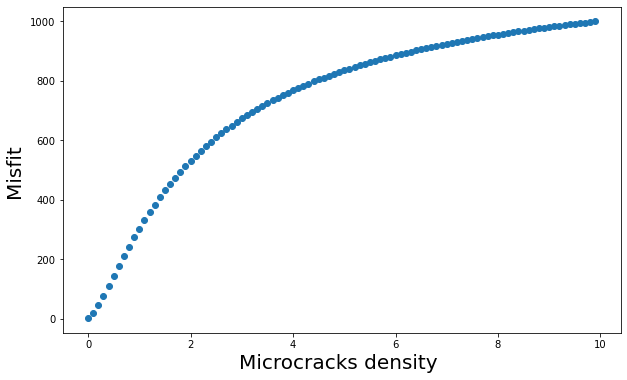

In [44]:
#K calculation IN A POROUS AND CRACKED rock

%matplotlib inline
#somehow you need to use inline magic


### Inversion to find the crack density 
K_quartz=37 #K moduus of mienarls
K_Calcite=74.8
K_Orthoclas=62
K_Argiles=44
K_Graphite=161



rho=np.arange(start=0,stop=10,step=0.1) #crack density
K_meas=35 #K measured 
phi=0.07 # porosity
aspect=0.001 # aspect ratio 
misfit_C=np.zeros(shape=(len(rho)))


for j,rho_value in enumerate(rho):
        
        K_pred=K_quartz/(1+(phi/(1-phi))*((3/2)+(4/9)*rho_value*((2+phi)/phi)*((4+3*pi*aspect)/(4-pi*aspect)))) # equation B36 articl L.Pimienta 2014
        misfit_K[j]=(K_pred-K_meas)**2
       
  
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(rho,misfit_C)

plt.xlabel("Microcracks density ",fontsize=20 ) 
plt.ylabel("Misfit ",fontsize=20)
plt.show() 


In [45]:
#K - Quartz
p= np.arange(start=0,stop=1,step=0.05)
alpha=0.00311 #=TC_fluid/C_matrice here fluid air C_air 0.024

K_L=[]
for x in p:
    K_l=K_quartz*((2*alpha+1+x*(alpha-1))/((2*alpha+1)-2*x*(alpha-1)))
    K_L.append(K_l)
    
# K - Calcite
p= np.arange(start=0,stop=1,step=0.05)
alpha=0.00311 #=TC_fluid/C_matrice here fluid air C_air 0.024

K_C=[]
for x in p:
    K_c=K_Calcite*((2*alpha+1+x*(alpha-1))/((2*alpha+1)-2*x*(alpha-1)))
    K_C.append(K_c)
    
# K - Orthoclas
p= np.arange(start=0,stop=1,step=0.05)
alpha=0.00311 #=TC_fluid/C_matrice here fluid air C_air 0.024

K_O=[]
for x in p:
    K_o=K_Orthoclas*((2*alpha+1+x*(alpha-1))/((2*alpha+1)-2*x*(alpha-1)))
    K_O.append(K_o)
    
# K - Argiles
p= np.arange(start=0,stop=1,step=0.05)
alpha=0.00311 #=TC_fluid/C_matrice here fluid air C_air 0.024

K_A=[]
for x in p:
    K_a=K_Argiles*((2*alpha+1+x*(alpha-1))/((2*alpha+1)-2*x*(alpha-1)))
    K_A.append(K_a)
    
# K - Graphite
p= np.arange(start=0,stop=1,step=0.05)
alpha=0.00311 #=TC_fluid/C_matrice here fluid air C_air 0.024

K_G=[]
for x in p:
    K_g=K_Graphite*((2*alpha+1+x*(alpha-1))/((2*alpha+1)-2*x*(alpha-1)))
    K_G.append(K_g)

In [81]:
#Thermal Conductivity :

TC_air=0.0024 #=TC_fluid/C_matrice here fluid air C_air 0.024
TC_quartz=7.7 #Thermal conductivity (TC) of quartz 
TС_K_feldspar=2.44
TC_Na_plagioclase=2.37
TC_Calcite=3.65
TC_Dolomite=5.97
TC_Chlorite=1.38



rho_value1 =0
rho_value2 =0.3
rho_value3 =1
aspect =0.0001

p= np.arange(start=0.0001,stop=1,step=0.05)

### Quartz_pure SANDSTONES 
#Euken-Maxwell sandstone
TCeucken_FoS=[]
for x in p:
    l=TC_quartz*((2*(TC_air/TC_quartz)+1+x*((TC_air/TC_quartz)-1))/((2*(TC_air/TC_quartz)+1)-2*x*((TC_air/TC_quartz)-1)))
    
    TCeucken_FoS.append(l)
#Pimienta et al. (2014) :
TCpim_FoSs=[]
TCpim_FoSs2=[]
TCpim_FoSs3=[]
for x in p:
    C_pred1=TC_quartz/(1+(x/(1-x))*((3/2)+(4/9)*rho_value1*((2+x)/x)*((4+3*pi*aspect)/(4-pi*aspect)))) # equation B36 articl L.Pimienta 2014
    TCpim_FoSs.append(C_pred1)
    C_pred2=TC_quartz/(1+(x/(1-x))*((3/2)+(4/9)*rho_value2*((2+x)/x)*((4+3*pi*aspect)/(4-pi*aspect)))) # equation B36 articl L.Pimienta 2014
    TCpim_FoSs2.append(C_pred2)
    C_pred3=TC_quartz/(1+(x/(1-x))*((3/2)+(4/9)*rho_value3*((2+x)/x)*((4+3*pi*aspect)/(4-pi*aspect)))) # equation B36 articl L.Pimienta 2014
    TCpim_FoSs3.append(C_pred3)
    
### SANDSTONES Artem 
#Distribution Sandstone (assuming the 4% missing are clays)
C_quartz =58/100
C_fspr =28/100
C_clay =14/100
TCarithmMat_Ss=C_quartz*TC_quartz+C_fspr*TС_K_feldspar+C_clay*TC_Chlorite
#Euken-Maxwell sandstone
TCeucken_Ss=[]
for x in p:
    l=TCarithmMat_Ss*((2*(TC_air/TCarithmMat_Ss)+1+x*((TC_air/TCarithmMat_Ss)-1))/((2*(TC_air/TCarithmMat_Ss)+1)-2*x*((TC_air/TCarithmMat_Ss)-1)))
    TCeucken_Ss.append(l)
#Pimienta et al. (2014) :
TCpim_Ss=[]
TCpim_Ss2=[]
TCpim_Ss3=[]
for x in p:
    C_pred=TCarithmMat_Ss/(1+(x/(1-x))*((3/2)+(4/9)*rho_value1*((2+x)/x)*((4+3*pi*aspect)/(4-pi*aspect)))) # equation B36 articl L.Pimienta 2014
    TCpim_Ss.append(C_pred)
    C_pred2=TCarithmMat_Ss/(1+(x/(1-x))*((3/2)+(4/9)*rho_value2*((2+x)/x)*((4+3*pi*aspect)/(4-pi*aspect)))) # equation B36 articl L.Pimienta 2014
    TCpim_Ss2.append(C_pred2)
    C_pred3=TCarithmMat_Ss/(1+(x/(1-x))*((3/2)+(4/9)*rho_value3*((2+x)/x)*((4+3*pi*aspect)/(4-pi*aspect)))) # equation B36 articl L.Pimienta 2014
    TCpim_Ss3.append(C_pred3)


### COMGLOMERATE 
#Distribution Conglomerate 1 (assuming the 4% missing are clays)
C_quartz =78/100
C_fspr =13/100
C_clay =5/100
TCarithmMat_Cg1=C_quartz*TC_quartz+C_fspr*TС_K_feldspar+C_clay*TC_Chlorite
#Euken-Maxwell sandstone (Carson, 2006)
TCeucken_Cg1=[]
for x in p:
    l=TCarithmMat_Cg1*((2*(TC_air/TCarithmMat_Cg1)+1+x*((TC_air/TCarithmMat_Cg1)-1))/((2*(TC_air/TCarithmMat_Cg1)+1)-2*x*((TC_air/TCarithmMat_Cg1)-1)))
    TCeucken_Cg1.append(l)
#Pimienta et al. (2014) :
TCpim_Cg=[]
TCpim_Cg2=[]
TCpim_Cg3=[]
for x in p:
    C_pred=TCarithmMat_Cg1/(1+(x/(1-x))*((3/2)+(4/9)*rho_value1*((2+x)/x)*((4+3*pi*aspect)/(4-pi*aspect)))) # equation B36 articl L.Pimienta 2014
    TCpim_Cg.append(C_pred)
    C_pred2=TCarithmMat_Cg1/(1+(x/(1-x))*((3/2)+(4/9)*rho_value2*((2+x)/x)*((4+3*pi*aspect)/(4-pi*aspect)))) # equation B36 articl L.Pimienta 2014
    TCpim_Cg2.append(C_pred2)
    C_pred3=TCarithmMat_Cg1/(1+(x/(1-x))*((3/2)+(4/9)*rho_value3*((2+x)/x)*((4+3*pi*aspect)/(4-pi*aspect)))) # equation B36 articl L.Pimienta 2014
    TCpim_Cg3.append(C_pred3)

### SHALE    
#Distribution shale 
C_quartz =45/100
C_fspr =30/100
C_clay =15/100
TCarithmMat_shale=C_quartz*TC_quartz+C_fspr*TС_K_feldspar+C_clay*TC_Chlorite
#Euken-Maxwell sandstone
TCeucken_shale=[]
for x in p:
    l=TCarithmMat_shale*((2*(TC_air/TCarithmMat_shale)+1+x*((TC_air/TCarithmMat_shale)-1))/((2*(TC_air/TCarithmMat_shale)+1)-2*x*((TC_air/TCarithmMat_shale)-1)))
    TCeucken_shale.append(l)
    
#Distribution claystone (assuming the 8% missing are clays)
C_quartz =45/100
C_fspr =27/100
C_clay =28/100
TCarithmMat_Cs=C_quartz*TC_quartz+C_fspr*TС_K_feldspar+C_clay*TC_Chlorite
#Euken-Maxwell sandstone
TCeucken_Cs=[]
for x in p:
    l=TCarithmMat_Cs*((2*(TC_air/TCarithmMat_Cs)+1+x*((TC_air/TCarithmMat_Cs)-1))/((2*(TC_air/TCarithmMat_Cs)+1)-2*x*((TC_air/TCarithmMat_Cs)-1)))
    TCeucken_Cs.append(l)

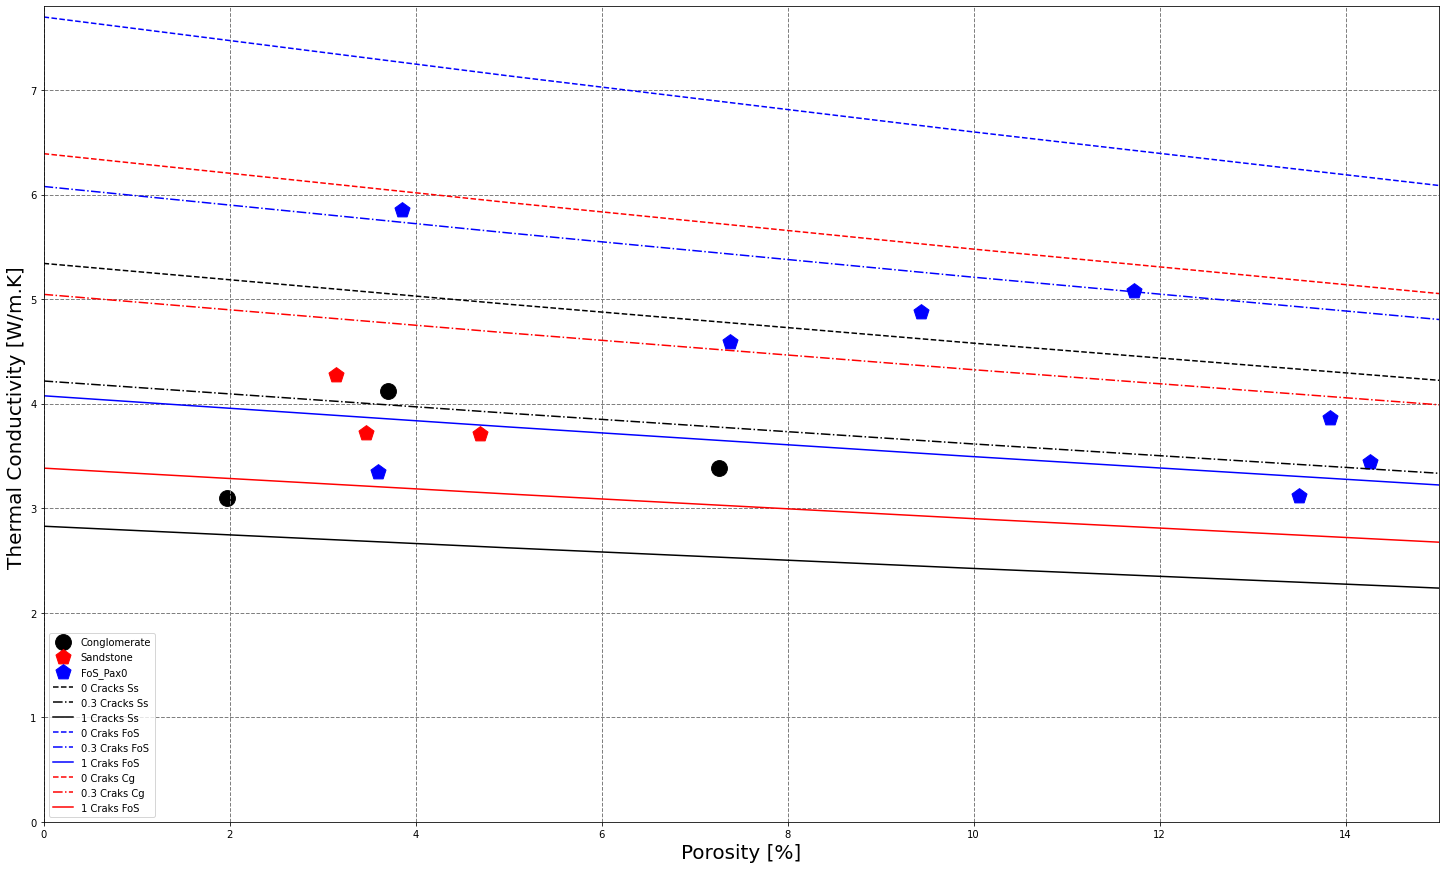

In [82]:
#Arti's plot
%matplotlib inline


plt.figure(figsize=(25, 15))
poro=np.arange(start=0,stop=100,step=5)

#Salsabyl data
TC_FoS_Pax0=[3.84,3.35,3.12,4.59,3.86,4.88,5.85,3.44,5.08]
TC_FoS_Pax5=[4.406,3.75,1.76,5.02,4.60,5.08,5.81,3.78,5.11]
Poro_FoS=[17,3.6,13.5,7.38,13.83,9.44,3.85,14.26,11.73]

#my data
phi=[2.38,2.51,1.97,3.14,3.47,2.58,5.27,8.04,4.45,7.08,12.98,7.26,3.70,8.60,8.70,5.64,7.03,6.28,2.83,7.82,6.60,8.09,9.21,5.32,4.69]
d_tc_list=[3.99,4.53,4.18,2.8,3.24,3.88,3.71,5.81,4.51,3.5,2.51,2.88,2.8,5.75,5.51,3.65,5.97,6.06,6.75,4.91,5.41,5.8,5.6,3.63,3.0]


plt.scatter(PHI_Conglomerate,TC_Conglomerate,marker="o",label='Conglomerate', s=250,color='k')
plt.scatter(PHI_Sandstone,TC_Sandstone,marker="p",label='Sandstone', s=250,color='r')
#plt.scatter(PHI_Claystone,TC_Claystone,marker="D",label='Claystone', s=250,color='c')
#plt.scatter(PHI_Shale,TC_Shale,marker="v",label='Shale', s=250,color='g')
plt.scatter(Poro_FoS,TC_FoS_Pax0,marker="p",label='FoS_Pax0', s=250,color='b')

#plt.plot(poro,TCeucken_FoS,label='Eucken-Maxwell Quartz',color='k')
#plt.plot(poro,TCeucken_Ss,label='Eucken-Maxwell Sandstone',color='r')
plt.plot(poro,TCpim_Ss,label='0 Cracks Ss',color='k', linestyle='dashed')
plt.plot(poro,TCpim_Ss2,label='0.3 Cracks Ss',color='k', linestyle='dashdot')
plt.plot(poro,TCpim_Ss3,label='1 Cracks Ss',color='k')

plt.plot(poro,TCpim_FoSs,label='0 Craks FoS',color='b', linestyle='dashed')
plt.plot(poro,TCpim_FoSs2,label='0.3 Craks FoS',color='b', linestyle='dashdot')
plt.plot(poro,TCpim_FoSs3,label='1 Craks FoS',color='b')

plt.plot(poro,TCpim_Cg,label='0 Craks Cg',color='r', linestyle='dashed')
plt.plot(poro,TCpim_Cg2,label='0.3 Craks Cg',color='r', linestyle='dashdot')
plt.plot(poro,TCpim_Cg3,label='1 Craks FoS',color='r')
##plt.plot(poro,TCpim_Ss,label='Cracks Sandstone',color='c')

#plt.plot(poro,TCeucken_Cg1,label='Eucken-Maxwell Conglo 1',color='k')
#plt.plot(poro,TCeucken_Cs,label='Eucken-Maxwell Claystone',color='c')
#plt.plot(poro,TCeucken_shale,label='Eucken-Maxwell Shale',color='g')

plt.xlim([0,15])
plt.ylim(0,7.8)
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)
plt.ylabel("Thermal Conductivity [W/m.K] ",fontsize=20)
plt.xlabel("Porosity [%]",fontsize=20) 
plt.legend()

In [92]:
G=df['rho']*(df['Vs']**2)
K=(df['rho']*df['Vp']**2)-(4/3*df['G'])

K_mult=K*10**-6



G_mult=G*10**-6
G_mult
K_mult

0     50.130490
1     45.339292
2     42.147198
3     42.631183
4     28.025750
5     44.529056
6      4.577738
7           NaN
8     56.281974
9     42.856731
10    22.660551
11    29.409304
12          NaN
13          NaN
14          NaN
15    21.570170
16          NaN
17     0.792715
18          NaN
19     1.298095
20    16.842310
21     0.745978
22          NaN
23    36.801226
24    38.292116
dtype: float64

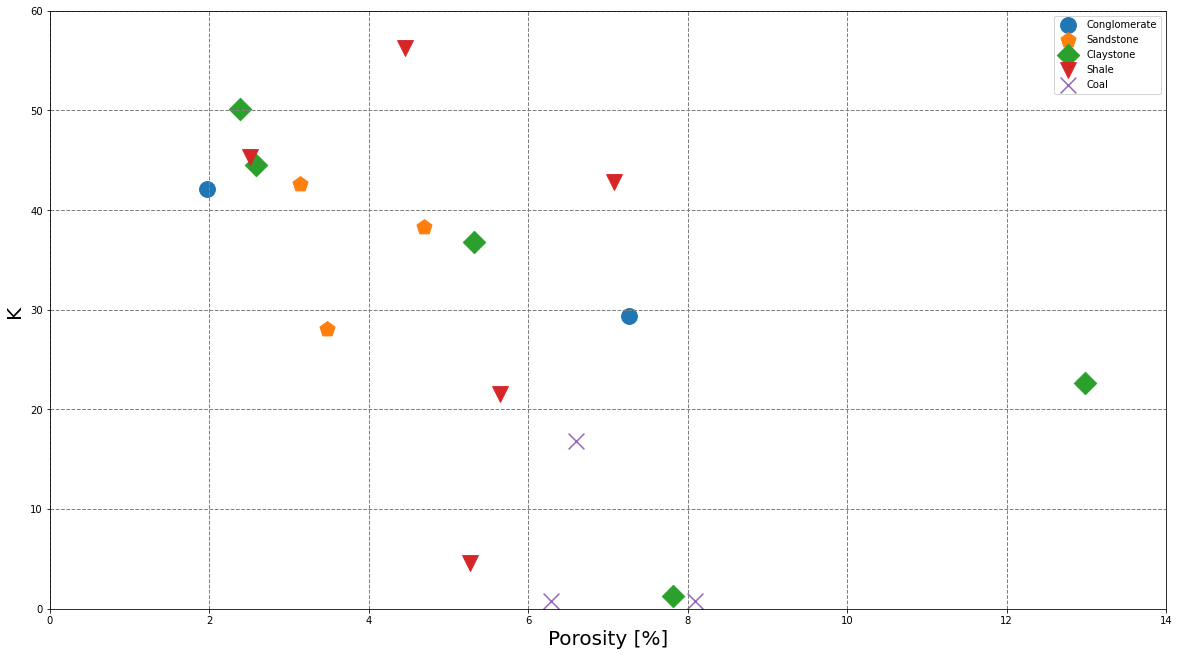

In [94]:
#Delta TC plot

K_coal=df['K_mult'].loc[df['lithology'] == 'Coal']
K_Shale=df['K_mult'].loc[df['lithology'] == 'Shale']
K_Claystone=df['K_mult'].loc[df['lithology'] == 'Claystone']
K_Conglomerate=df['K_mult'].loc[df['lithology'] == 'Conglomerate']
K_Sandstone=df['K_mult'].loc[df['lithology'] == 'Sandstone']


plt.figure(figsize=(20, 11))
poro=np.arange(start=0,stop=100,step=5)

plt.scatter(PHI_Conglomerate,K_Conglomerate,marker="o",label='Conglomerate', s=250)
plt.scatter(PHI_Sandstone,K_Sandstone,marker="p",label='Sandstone', s=250)
plt.scatter(PHI_Claystone,K_Claystone,marker="D",label='Claystone', s=250)
plt.scatter(PHI_Shale,K_Shale,marker="v",label='Shale', s=250)
plt.scatter(PHI_coal,K_coal,marker="x",label='Coal', s=250)





plt.xlim([0,14])
plt.ylim(0,60)
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)
plt.ylabel("K ",fontsize=20)
plt.xlabel("Porosity [%]",fontsize=20) 
plt.legend()


In [93]:
df['K_mult']=K_mult

df

,tc,td,phi,lithology,d_tc,tc_pred,rho,Cp,rho_calculated,Vp,Vs,Ro_Cp,G,K_mult
0,3.22,2.078,2.38,Claystone,4.00,7.22,2.66,0.582544,2.66,5207.0,2490.0,1.549567,16492266.00,50.130490
1,2.64,1.643,2.51,Shale,4.54,7.18,2.65,0.606346,2.65,5250.0,2800.0,1.606817,20776000.00,45.339292
2,3.10,2.258,1.97,Conglomerate,4.19,7.29,2.63,0.522014,2.63,4884.0,2423.0,1.372896,15440543.27,42.147198
3,4.27,2.641,3.14,Sandstone,2.80,7.07,2.60,0.621851,2.60,5081.0,2658.0,1.616812,18368906.40,42.631183
4,3.72,2.961,3.47,Sandstone,3.25,6.97,2.60,0.483205,2.60,4286.0,2386.0,1.256332,14801789.60,28.025750
5,3.29,2.651,2.58,Claystone,3.88,7.17,2.64,0.470091,2.64,5040.0,2530.0,1.241041,16898376.00,44.529056
6,2.88,1.729,5.27,Shale,3.72,6.60,2.57,0.648133,2.57,2039.0,1335.0,1.665703,4580318.25,4.577738
7,0.33,0.335,8.04,Coal,5.81,6.14,1.22,0.807438,1.22,NaN,NaN,0.985075,NaN,NaN
8,2.25,1.137,4.45,Shale,4.51,6.76,2.79,0.709280,2.79,5526.0,2788.0,1.978892,21686513.76,56.281974
9,2.80,1.671,7.08,Shale,3.50,6.30,3.02,0.554849,3.02,4884.0,2692.0,1.675643,21885529.28,42.856731


In [142]:
Km=37
Gm=45
Kf=2.2
rho=0
phi=np.arange(start=0,stop=0.4,step=0.01)
aspect=0.001
rho_value=2.65

Geff_pred1=np.zeros(len(phi))
Keff_pred1=np.zeros(len(phi))
Gp_pred=np.zeros(len(phi))
Kp_pred=np.zeros(len(phi))
ratio_p1=np.zeros(len(phi))
V_pred1=np.zeros(len(phi))
#
Keff_pred_sat1=np.zeros(len(phi))
Geff_pred_sat1=np.zeros(len(phi))
Kp_pred_sat=np.zeros(len(phi))
Gp_pred_sat=np.zeros(len(phi))
sigma_eff=np.zeros(len(phi))
elastic_sat=np.zeros(len(phi))
ratio_sat1=np.zeros(len(phi))
delta_c=np.zeros(len(phi))
#
Em=9*Km*Gm/(3*Km+Gm)
ratio_K=(3*Km-2*Gm)/(2*(3*Km+Gm))
alpha=Kf/Km
alpha_eff=np.zeros(len(phi))



#Sec
for j,phi_value in enumerate(phi):
    
    Kp_pred[j] = Km/(1 + ((3/2)*((1-ratio_K)/(1-2*ratio_K)))*phi_value/(1-phi_value))
    Gp_pred[j] = Gm/(1+(15*(1-ratio_K)/(7-5*ratio_K))*phi_value/(1-phi_value))
    ratio_p1[j]=(3*Kp_pred[j]-2*Gp_pred[j])/(2*(3*Kp_pred[j]+Gp_pred[j]))
    V_pred1[j]=math.sqrt((Kp_pred[j]+(4/3)*Gp_pred[j])/(rho_value*(1-phi_value)))

In [143]:
V_pred1

array([6.05010525, 6.02261984, 5.99553729, 5.96884731, 5.94254   ,
       5.91660583, 5.89103558, 5.86582037, 5.84095163, 5.81642108,
       5.79222073, 5.76834286, 5.74478   , 5.72152494, 5.69857068,
       5.67591049, 5.65353781, 5.63144632, 5.60962988, 5.58808256,
       5.5667986 , 5.54577243, 5.52499862, 5.50447193, 5.48418727,
       5.4641397 , 5.44432442, 5.42473676, 5.40537221, 5.38622637,
       5.36729496, 5.34857383, 5.33005895, 5.31174638, 5.29363231,
       5.27571302, 5.2579849 , 5.24044441, 5.22308814, 5.20591274])

In [97]:
Vs_calc= np.sqrt(df['G']/df['rho'])

Vs_calc

0     2490.0
1     2800.0
2     2423.0
3     2658.0
4     2386.0
5     2530.0
6     1335.0
7        NaN
8     2788.0
9     2692.0
10    2692.0
11    1969.0
12       NaN
13       NaN
14       NaN
15    2593.0
16       NaN
17     502.0
18       NaN
19     568.0
20    1707.0
21     510.0
22       NaN
23    2658.0
24    2520.0
dtype: float64

In [103]:
V_pred1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [98]:
#K calculation with selected XRD samples

K_qtz=37 #K moduus of mienarls
K_Calcite=74.8
K_Orthoclas=62
K_clay=44
K_Graphite=161
K_fspr=55 #assumption

G_quartz=44 #G moduus of mienarls
G_Calcite=30.6
G_Orthoclas=29.3
G_Argiles=22.1
G_Graphite=109.3

#SS
C_qtz_ss=0.58
C_fspr_ss=0.28
C_clay_ss=0.1

#Cg
C_qtz_cg=0.78
C_fspr_cg=0.13
C_clay_cg=0.05


K_SS=K_qtz*C_qtz_ss+K_fspr*C_fspr_ss+K_clay*C_clay_ss
K_CG=K_qtz*C_qtz_cg+K_fspr*C_fspr_cg+K_clay*C_clay_cg

K_SS


41.26

In [224]:
K_qtz=37 #K moduus of mienarls
K_Calcite=74.8
K_Orthoclas=62
K_clay=12.3  #TLE N Mondol (2008)  : smectite dry
K_Graphite=161
K_fspr=37.5 #assumption

G_qtz=44 #G moduus of minerals
G_Calcite=30.6
G_Orthoclas=29.3
G_clay=15.6   #TLE N Mondol (2008)  : smectite dry
G_Graphite=109.3
G_fspr=15

rho_quartz=2.65
rho_calc=2.7
rho_fspr=2.6 #assumption
rho_clay=2.6 #assumption

phi=np.arange(start=0,stop=1,step=0.01)

#SS
C_qtz_ss=0.58
C_fspr_ss=0.28
C_clay_ss=0.1

#Cg
C_qtz_cg=0.78
C_fspr_cg=0.13
C_clay_cg=0.05


#K - quartz
K_MatQtz=[]
G_MatQtz=[]
Vp_MatQtz=[]
Vs_MatQtz=[]
Gp_pred=np.zeros(len(phi))
Kp_pred=np.zeros(len(phi))
Vp_pred=np.zeros(len(phi))
Vs_pred=np.zeros(len(phi))

for j,phi_value in enumerate(phi):
    Km = K_qtz
    Gm = G_qtz
    rho_value = rho_quartz
    Em=9*Km*Gm/(3*Km+Gm)
    ratio_K=(3*Km-2*Gm)/(2*(3*Km+Gm)) 
    Kp_pred[j] = Km/(1 + ((3/2)*((1-ratio_K)/(1-2*ratio_K)))*phi_value/(1-phi_value))
    Gp_pred[j] = Gm/(1+(15*(1-ratio_K)/(7-5*ratio_K))*phi_value/(1-phi_value))
    Vp_pred[j]=math.sqrt((Kp_pred[j]+(4/3)*Gp_pred[j])/(rho_value*(1-phi_value)))
    Vs_pred[j]=math.sqrt((Gp_pred[j])/(rho_value*(1-phi_value)))
    K_MatQtz=Kp_pred
    G_MatQtz=Gp_pred
    Vp_MatQtz=Vp_pred
    Vs_MatQtz=Vs_pred   

#K - fspr
K_Matfspr=[]
G_Matfspr=[]
Vp_Matfspr=[]
Vs_Matfspr=[]
Gp_pred1=np.zeros(len(phi))
Kp_pred1=np.zeros(len(phi))
Vp_pred1=np.zeros(len(phi))
Vs_pred1=np.zeros(len(phi))
for j,phi_value in enumerate(phi): 
    Km = K_fspr
    Gm = G_fspr
    rho_value = rho_fspr
    Em=9*Km*Gm/(3*Km+Gm)
    ratio_K=(3*Km-2*Gm)/(2*(3*Km+Gm))   
    Kp_pred1[j] = Km/(1 + ((3/2)*((1-ratio_K)/(1-2*ratio_K)))*phi_value/(1-phi_value))
    Gp_pred1[j] = Gm/(1+(15*(1-ratio_K)/(7-5*ratio_K))*phi_value/(1-phi_value))
    Vp_pred1[j]=math.sqrt((Kp_pred1[j]+(4/3)*Gp_pred1[j])/(rho_value*(1-phi_value)))
    Vs_pred1[j]=math.sqrt((Gp_pred1[j])/(rho_value*(1-phi_value)))
    K_Matfspr=Kp_pred1
    G_Matfspr=Gp_pred1
    Vp_Matfspr=Vp_pred1
    Vs_Matfspr=Vs_pred1
   
#K - SS
K_SS=[]
G_SS=[]
Vp_SS=[]
Vs_SS=[]
Gp_pred=np.zeros(len(phi))
Kp_pred=np.zeros(len(phi))
Vp_pred=np.zeros(len(phi))
Vs_pred=np.zeros(len(phi))

for j,phi_value in enumerate(phi):
    Km = K_qtz*C_qtz_ss+K_fspr*C_fspr_ss+K_clay*C_clay_ss
    Gm = G_qtz*C_qtz_ss+G_fspr*C_fspr_ss+G_clay*C_clay_ss
    rho_value = rho_quartz*C_qtz_ss+rho_fspr*C_fspr_ss+rho_clay*C_clay_ss
    Em=9*Km*Gm/(3*Km+Gm)
    ratio_K=(3*Km-2*Gm)/(2*(3*Km+Gm)) 
    Kp_pred[j] = Km/(1 + ((3/2)*((1-ratio_K)/(1-2*ratio_K)))*phi_value/(1-phi_value))
    Gp_pred[j] = Gm/(1+(15*(1-ratio_K)/(7-5*ratio_K))*phi_value/(1-phi_value))
    Vp_pred[j]=math.sqrt((Kp_pred[j]+(4/3)*Gp_pred[j])/(rho_value*(1-phi_value)))
    Vs_pred[j]=math.sqrt((Gp_pred[j])/(rho_value*(1-phi_value)))
    K_SS=Kp_pred
    G_SS=Gp_pred
    Vp_SS=Vp_pred
    Vs_SS=Vs_pred
    
#K - Conglomerate
K_CG=[]
G_CG=[]
Vp_CG=[]
Vs_CG=[]
Gp_pred=np.zeros(len(phi))
Kp_pred=np.zeros(len(phi))
Vp_pred=np.zeros(len(phi))
Vs_pred=np.zeros(len(phi))

for j,phi_value in enumerate(phi):
    Km = K_qtz*C_qtz_cg+K_fspr*C_fspr_cg+K_clay*C_clay_cg
    Gm = G_qtz*C_qtz_cg+G_fspr*C_fspr_cg+G_clay*C_clay_cg
    rho_value = rho_quartz*C_qtz_cg+rho_fspr*C_fspr_cg+rho_clay*C_clay_cg
    Em=9*Km*Gm/(3*Km+Gm)
    ratio_K=(3*Km-2*Gm)/(2*(3*Km+Gm)) 
    Kp_pred[j] = Km/(1 + ((3/2)*((1-ratio_K)/(1-2*ratio_K)))*phi_value/(1-phi_value))
    Gp_pred[j] = Gm/(1+(15*(1-ratio_K)/(7-5*ratio_K))*phi_value/(1-phi_value))
    Vp_pred[j]=math.sqrt((Kp_pred[j]+(4/3)*Gp_pred[j])/(rho_value*(1-phi_value)))
    Vs_pred[j]=math.sqrt((Gp_pred[j])/(rho_value*(1-phi_value)))
    K_CG=Kp_pred
    G_CG=Gp_pred
    Vp_CG=Vp_pred
    Vs_CG=Vs_pred
    
Vp_SS

array([5.44628738, 5.42099584, 5.3960614 , 5.37147557, 5.34723015,
       5.3233172 , 5.29972904, 5.27645824, 5.25349763, 5.23084023,
       5.20847933, 5.18640838, 5.16462108, 5.14311128, 5.12187305,
       5.10090062, 5.0801884 , 5.05973097, 5.03952306, 5.01955956,
       4.9998355 , 4.98034607, 4.96108656, 4.94205244, 4.92323927,
       4.90464274, 4.88625868, 4.868083  , 4.85011174, 4.83234105,
       4.81476717, 4.79738645, 4.78019533, 4.76319033, 4.74636807,
       4.72972528, 4.71325873, 4.6969653 , 4.68084194, 4.66488567,
       4.64909359, 4.63346288, 4.61799076, 4.60267454, 4.5875116 ,
       4.57249936, 4.55763532, 4.54291702, 4.52834207, 4.51390813,
       4.49961293, 4.48545422, 4.47142984, 4.45753763, 4.44377553,
       4.43014148, 4.4166335 , 4.40324964, 4.38998798, 4.37684666,
       4.36382386, 4.35091779, 4.33812669, 4.32544885, 4.3128826 ,
       4.3004263 , 4.28807832, 4.27583711, 4.26370112, 4.25166882,
       4.23973875, 4.22790945, 4.2161795 , 4.20454751, 4.19301

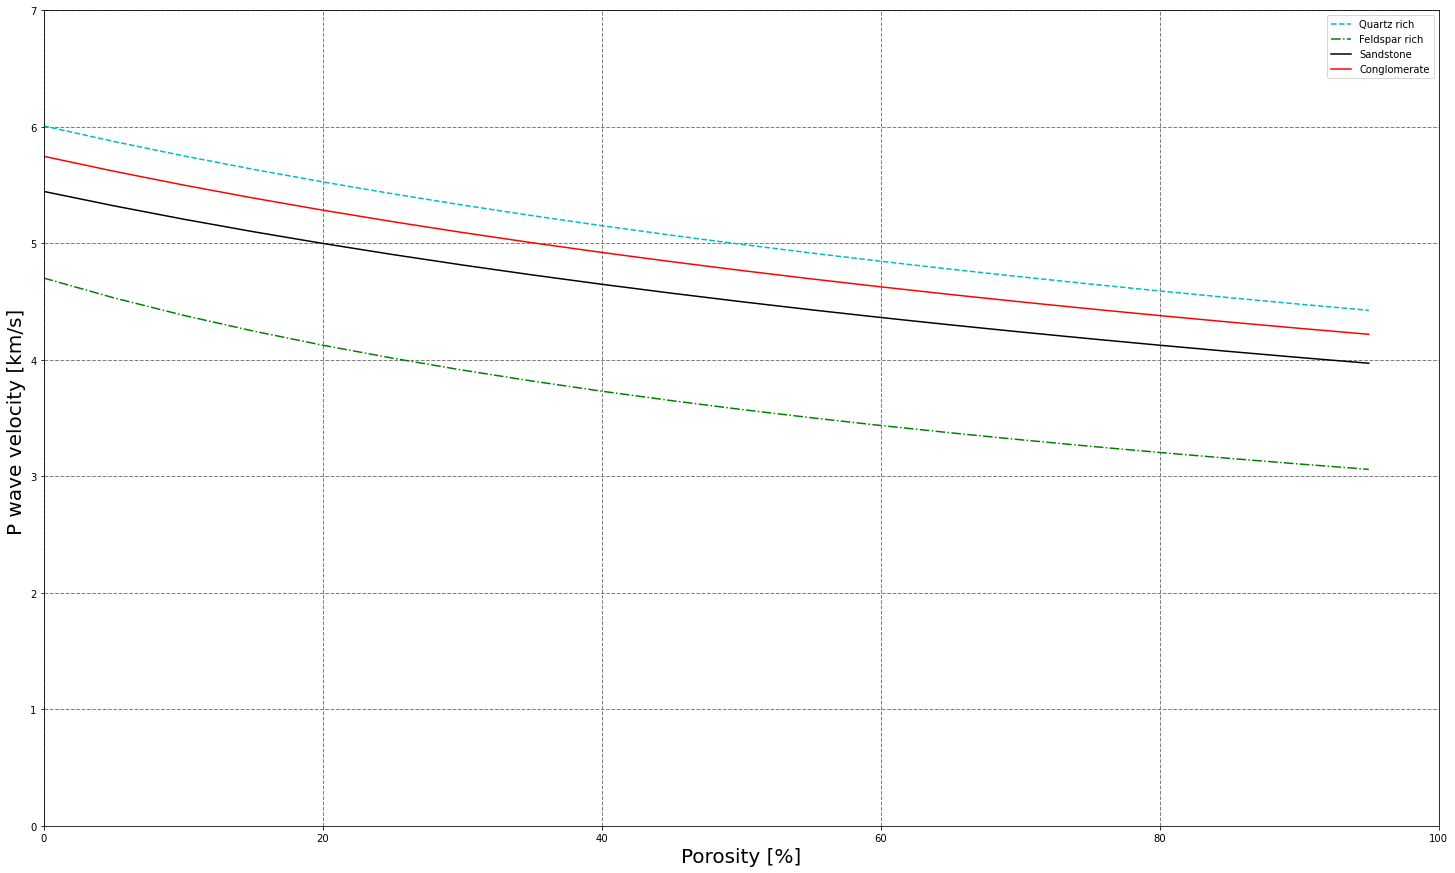

In [197]:
plt.figure(figsize=(25, 15))
poro=np.arange(start=0,stop=100,step=5)
#poro=np.arange(start=0,stop=0.4,step=0.01)

plt.plot(poro,Vp_MatQtz,label='Quartz rich',color='c', linestyle='dashed')
plt.plot(poro,Vp_Matfspr,label='Feldspar rich',color='g', linestyle='dashdot')
plt.plot(poro,Vp_SS,label='Sandstone',color='k')
plt.plot(poro,Vp_CG,label='Conglomerate',color='r')
#plt.plot(poro,TCpim_Ss3,label='1 Cracks Ss',color='k')


plt.xlim([0,100])
plt.ylim(0,7)
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)
plt.ylabel("P wave velocity [km/s] ",fontsize=20)
plt.xlabel("Porosity [%]",fontsize=20) 
plt.legend()

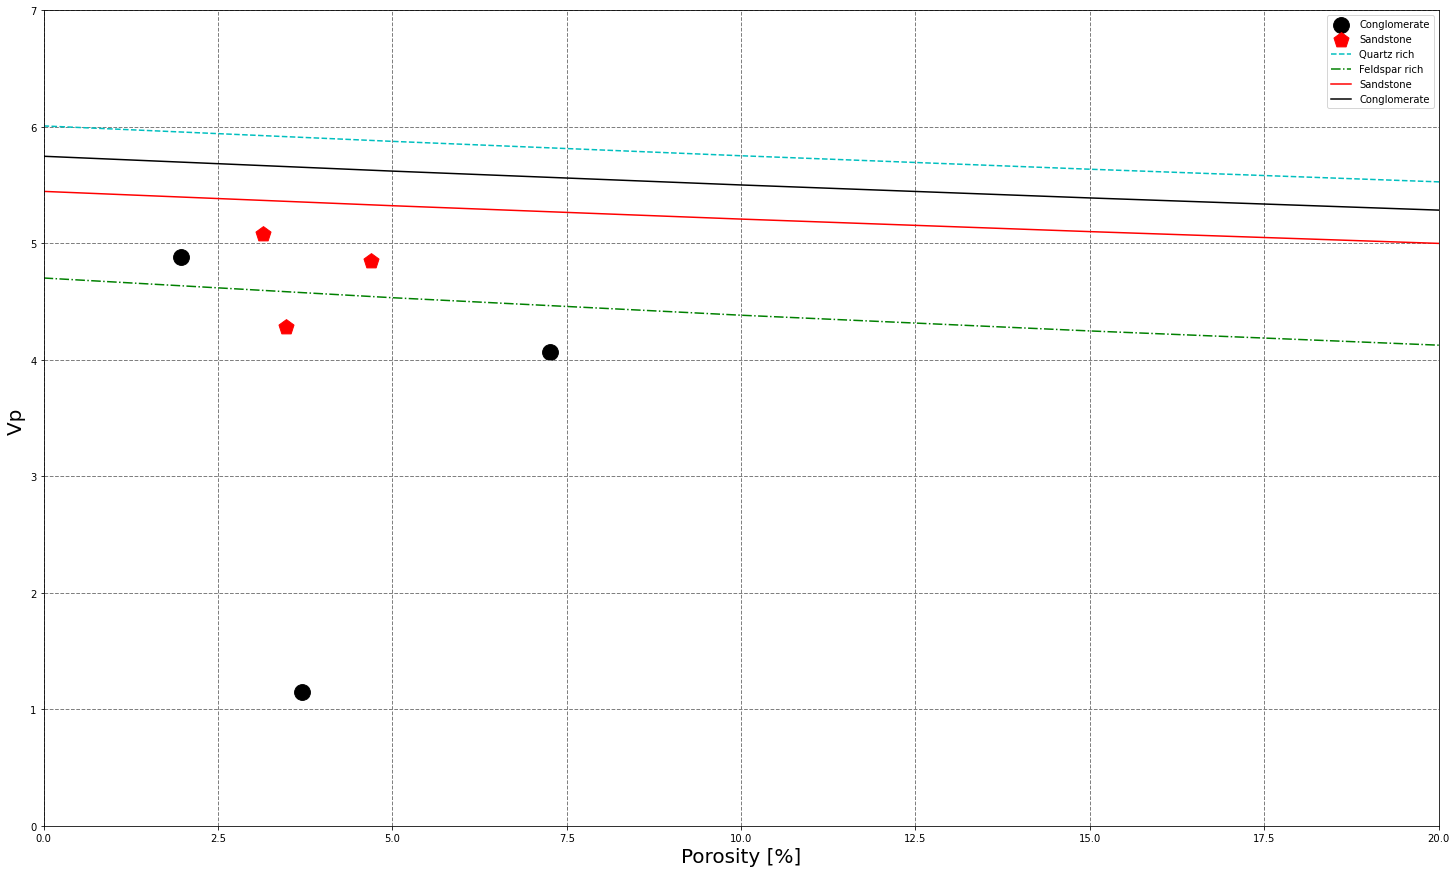

In [199]:
Vp_coal=df['Vp'].loc[df['lithology'] == 'Coal']
Vp_Shale=df['Vp'].loc[df['lithology'] == 'Shale']
Vp_Claystone=df['Vp'].loc[df['lithology'] == 'Claystone']
Vp_Conglomerate=df['Vp'].loc[df['lithology'] == 'Conglomerate']
Vp_Sandstone=df['Vp'].loc[df['lithology'] == 'Sandstone']

Vs_coal=df['Vs'].loc[df['lithology'] == 'Coal']
Vs_Shale=df['Vs'].loc[df['lithology'] == 'Shale']
Vs_Claystone=df['Vs'].loc[df['lithology'] == 'Claystone']
Vs_Conglomerate=df['Vs'].loc[df['lithology'] == 'Conglomerate']
Vs_Sandstone=df['Vs'].loc[df['lithology'] == 'Sandstone']

phi_coal=df['phi'].loc[df['lithology'] == 'Coal']
phi_Shale=df['phi'].loc[df['lithology'] == 'Shale']
phi_Claystone=df['phi'].loc[df['lithology'] == 'Claystone']
phi_Conglomerate=df['phi'].loc[df['lithology'] == 'Conglomerate']
phi_Sandstone=df['phi'].loc[df['lithology'] == 'Sandstone']

plt.figure(figsize=(25, 15))
poro=np.arange(start=0,stop=100,step=5)
#poro=np.arange(start=0,stop=0.4,step=0.01)


#my data
#phi=[2.38,2.51,1.97,3.14,3.47,2.58,5.27,8.04,4.45,7.08,12.98,7.26,3.70,8.60,8.70,5.64,7.03,6.28,2.83,7.82,6.60,8.09,9.21,5.32,4.69]
#d_tc_list=[3.99,4.53,4.18,2.8,3.24,3.88,3.71,5.81,4.51,3.5,2.51,2.88,2.8,5.75,5.51,3.65,5.97,6.06,6.75,4.91,5.41,5.8,5.6,3.63,3.0]


plt.scatter(phi_Conglomerate,Vp_Conglomerate/1000,marker="o",label='Conglomerate', s=250,color='k')
plt.scatter(phi_Sandstone,Vp_Sandstone/1000,marker="p",label='Sandstone', s=250,color='r')

#plt.plot(poro,TCeucken_FoS,label='Eucken-Maxwell Quartz',color='k')
#plt.plot(poro,TCeucken_Ss,label='Eucken-Maxwell Sandstone',color='r')
plt.plot(poro,Vp_MatQtz,label='Quartz rich',color='c', linestyle='dashed')
plt.plot(poro,Vp_Matfspr,label='Feldspar rich',color='g', linestyle='dashdot')
plt.plot(poro,Vp_SS,label='Sandstone',color='r')
plt.plot(poro,Vp_CG,label='Conglomerate',color='k')

plt.xlim([0,20])
plt.ylim(0,7)
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)
plt.ylabel("Vp ",fontsize=20)
plt.xlabel("Porosity [%]",fontsize=20) 
plt.legend()

In [225]:
phi_Sandstone

3     3.14
4     3.47
24    4.69
Name: phi, dtype: float64

In [226]:
# Calculating the DVp : Deviation of real data from the theoretical porosity dependence for a well-cemented, unclean, conglomerate (XRD mineralogy) 
dVp_cg1=5.67027355-4.884
dVp_cg2=5.645-1.145
dVp_cg3=5.57-4.065

dVp_ss1=5.37-5.08
dVp_ss2=5.36-4.29
dVp_ss3=5.32-4.85

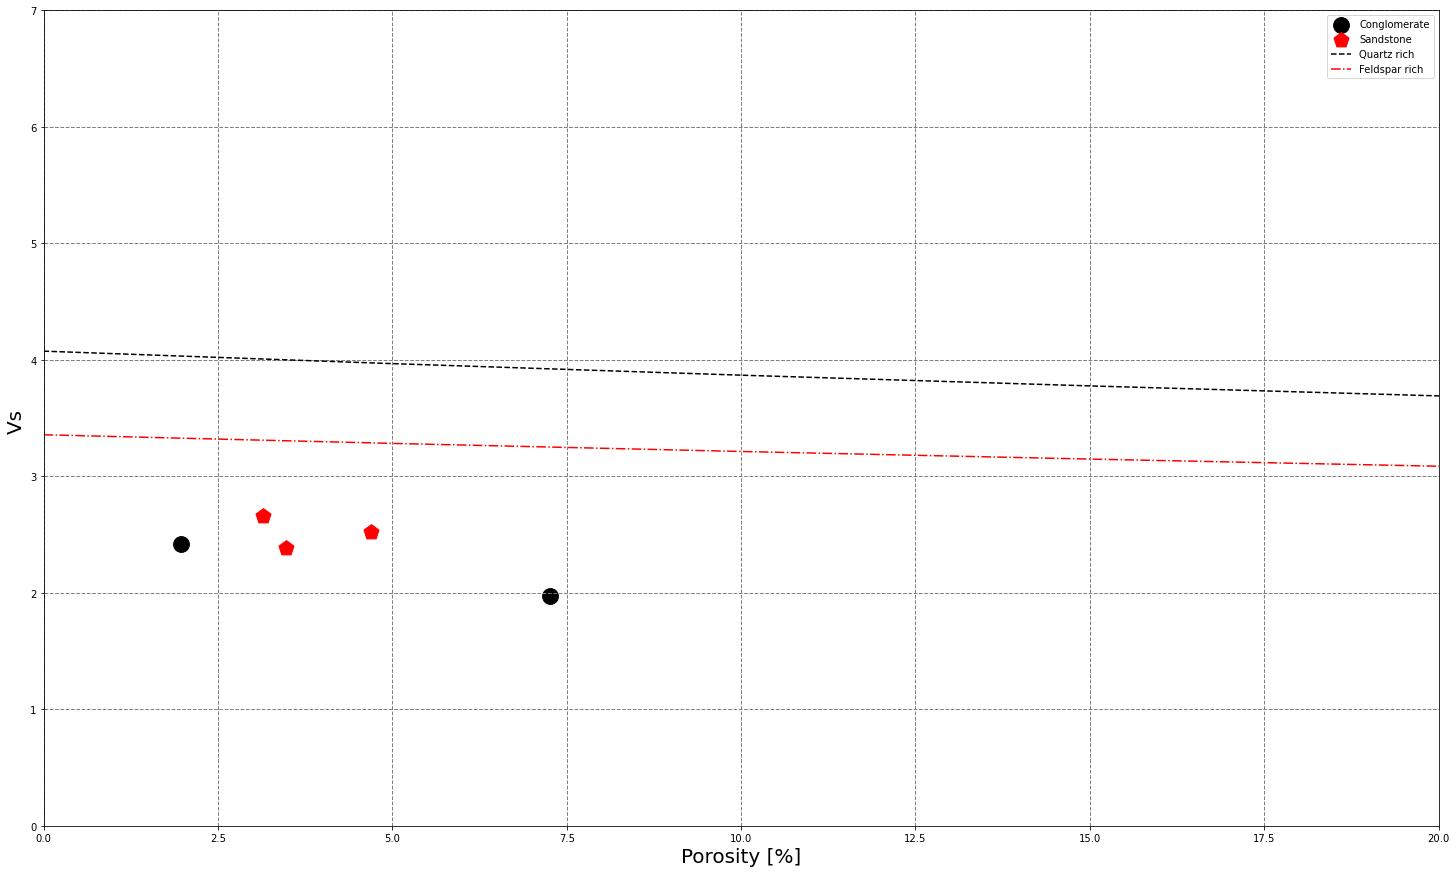

In [182]:
Vp_coal=df['Vp'].loc[df['lithology'] == 'Coal']
Vp_Shale=df['Vp'].loc[df['lithology'] == 'Shale']
Vp_Claystone=df['Vp'].loc[df['lithology'] == 'Claystone']
Vp_Conglomerate=df['Vp'].loc[df['lithology'] == 'Conglomerate']
Vp_Sandstone=df['Vp'].loc[df['lithology'] == 'Sandstone']

Vs_coal=df['Vs'].loc[df['lithology'] == 'Coal']
Vs_Shale=df['Vs'].loc[df['lithology'] == 'Shale']
Vs_Claystone=df['Vs'].loc[df['lithology'] == 'Claystone']
Vs_Conglomerate=df['Vs'].loc[df['lithology'] == 'Conglomerate']
Vs_Sandstone=df['Vs'].loc[df['lithology'] == 'Sandstone']

phi_coal=df['phi'].loc[df['lithology'] == 'Coal']
phi_Shale=df['phi'].loc[df['lithology'] == 'Shale']
phi_Claystone=df['phi'].loc[df['lithology'] == 'Claystone']
phi_Conglomerate=df['phi'].loc[df['lithology'] == 'Conglomerate']
phi_Sandstone=df['phi'].loc[df['lithology'] == 'Sandstone']

plt.figure(figsize=(25, 15))
poro=np.arange(start=0,stop=100,step=5)
#poro=np.arange(start=0,stop=0.4,step=0.01)


#my data
#phi=[2.38,2.51,1.97,3.14,3.47,2.58,5.27,8.04,4.45,7.08,12.98,7.26,3.70,8.60,8.70,5.64,7.03,6.28,2.83,7.82,6.60,8.09,9.21,5.32,4.69]
#d_tc_list=[3.99,4.53,4.18,2.8,3.24,3.88,3.71,5.81,4.51,3.5,2.51,2.88,2.8,5.75,5.51,3.65,5.97,6.06,6.75,4.91,5.41,5.8,5.6,3.63,3.0]


plt.scatter(phi_Conglomerate,Vs_Conglomerate/1000,marker="o",label='Conglomerate', s=250,color='k')
plt.scatter(phi_Sandstone,Vs_Sandstone/1000,marker="p",label='Sandstone', s=250,color='r')

#plt.plot(poro,TCeucken_FoS,label='Eucken-Maxwell Quartz',color='k')
#plt.plot(poro,TCeucken_Ss,label='Eucken-Maxwell Sandstone',color='r')
plt.plot(poro,Vs_MatQtz,label='Quartz rich',color='k', linestyle='dashed')
plt.plot(poro,Vs_Matfspr,label='Feldspar rich',color='r', linestyle='dashdot')
#plt.plot(poro,TCpim_Ss3,label='1 Cracks Ss',color='k')


plt.xlim([0,20])
plt.ylim(0,7)
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)
plt.ylabel("Vs ",fontsize=20)
plt.xlabel("Porosity [%]",fontsize=20) 
plt.legend()

In [227]:
df

# Calculating the DVp : Deviation of real data from the theoretical porosity dependence for a well-cemented, unclean, conglomerate (XRD mineralogy) 
dVp_cg1=5.67-4.884
dVp_cg2=5.65-1.145
dVp_cg3=5.57-4.065

dVp_ss1=5.37-5.08
dVp_ss2=5.36-4.29
dVp_ss3=5.32-4.85

Vp_q_pred_Cg=[5970, 5850, 5800] #assumption
Phi_Cg=[1.97, 7.26]
Vp_pred_ss=[5950, 5930, 5900] #assumption
Phi_ss=[3.14, 3.47, 4.69]

dVp_q=[0,0,dVp_cg1,dVp_ss1,dVp_ss2,0,0,0,0,0,0,dVp_cg3,dVp_cg2,0,0,0,0,0,0,0,0,0,0,0,dVp_ss3]
dVs_q=[0,0,1637,1342,1609,0,0,0,0,0,0,1991,0,0,0,0,0,0,0,0,0,0,0,0,1465]

Vs_q_pred_Cg=[4060, 3960]
Phi_Cg=[1.97, 7.26]
Vs_pred_ss=[4000, 3995, 3985]
Phi_ss=[3.14, 3.47, 4.69]


df['dVp_q']=dVp_q
df['dVs_q']=dVs_q

df

,tc,td,phi,lithology,d_tc,tc_pred,rho,Cp,rho_calculated,Vp,Vs,Ro_Cp,G,K_mult,dVp_q,dVs_q
0,3.22,2.078,2.38,Claystone,4.00,7.22,2.66,0.582544,2.66,5207.0,2490.0,1.549567,16492266.00,50.130490,0.000,0
1,2.64,1.643,2.51,Shale,4.54,7.18,2.65,0.606346,2.65,5250.0,2800.0,1.606817,20776000.00,45.339292,0.000,0
2,3.10,2.258,1.97,Conglomerate,4.19,7.29,2.63,0.522014,2.63,4884.0,2423.0,1.372896,15440543.27,42.147198,0.786,1637
3,4.27,2.641,3.14,Sandstone,2.80,7.07,2.60,0.621851,2.60,5081.0,2658.0,1.616812,18368906.40,42.631183,0.290,1342
4,3.72,2.961,3.47,Sandstone,3.25,6.97,2.60,0.483205,2.60,4286.0,2386.0,1.256332,14801789.60,28.025750,1.070,1609
5,3.29,2.651,2.58,Claystone,3.88,7.17,2.64,0.470091,2.64,5040.0,2530.0,1.241041,16898376.00,44.529056,0.000,0
6,2.88,1.729,5.27,Shale,3.72,6.60,2.57,0.648133,2.57,2039.0,1335.0,1.665703,4580318.25,4.577738,0.000,0
7,0.33,0.335,8.04,Coal,5.81,6.14,1.22,0.807438,1.22,NaN,NaN,0.985075,NaN,NaN,0.000,0
8,2.25,1.137,4.45,Shale,4.51,6.76,2.79,0.709280,2.79,5526.0,2788.0,1.978892,21686513.76,56.281974,0.000,0
9,2.80,1.671,7.08,Shale,3.50,6.30,3.02,0.554849,3.02,4884.0,2692.0,1.675643,21885529.28,42.856731,0.000,0


In [178]:
Vp_Qtz=6057
Vs_Qtz=4153

Vp_fspr=4680
Vs_fspr=2390

rho_Qtz=2.65
rho_fspr=2.56

#K_Qtz=37
#K_fspr=37.5

#G_Qtz=44
#G_fspr=15

E_Qtz=95
E_fspr=39.6

#https://link.springer.com/article/10.1007/s42452-020-03300-1/tables/4






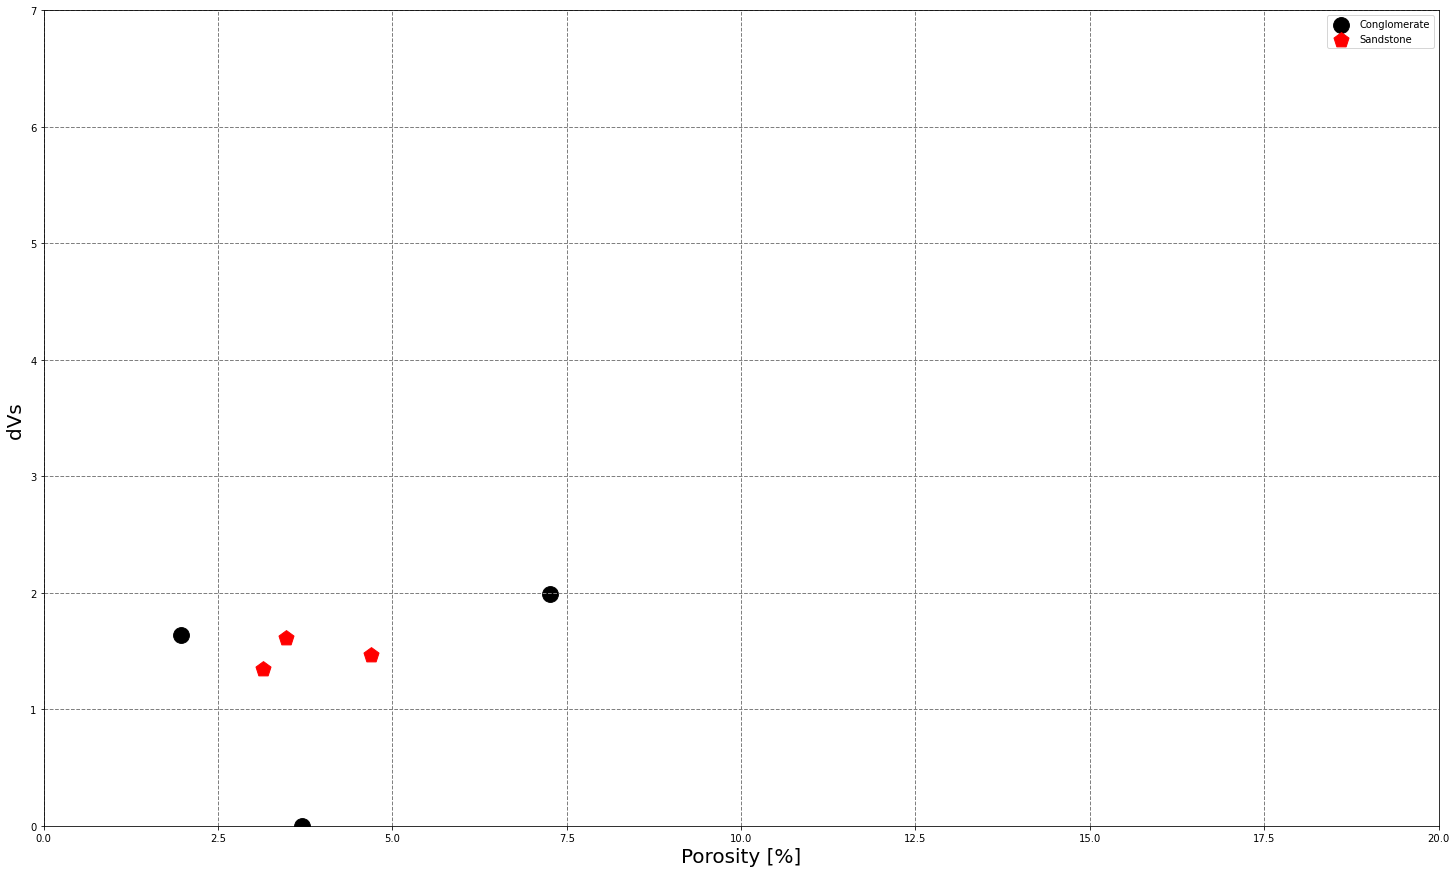

In [186]:


dVs_coal=df['dVs_q'].loc[df['lithology'] == 'Coal']
dVs_Shale=df['dVs_q'].loc[df['lithology'] == 'Shale']
dVs_Claystone=df['dVs_q'].loc[df['lithology'] == 'Claystone']
dVs_Conglomerate=df['dVs_q'].loc[df['lithology'] == 'Conglomerate']
dVs_Sandstone=df['dVs_q'].loc[df['lithology'] == 'Sandstone']

phi_coal=df['phi'].loc[df['lithology'] == 'Coal']
phi_Shale=df['phi'].loc[df['lithology'] == 'Shale']
phi_Claystone=df['phi'].loc[df['lithology'] == 'Claystone']
phi_Conglomerate=df['phi'].loc[df['lithology'] == 'Conglomerate']
phi_Sandstone=df['phi'].loc[df['lithology'] == 'Sandstone']

plt.figure(figsize=(25, 15))
poro=np.arange(start=0,stop=100,step=5)
#poro=np.arange(start=0,stop=0.4,step=0.01)


#my data
#phi=[2.38,2.51,1.97,3.14,3.47,2.58,5.27,8.04,4.45,7.08,12.98,7.26,3.70,8.60,8.70,5.64,7.03,6.28,2.83,7.82,6.60,8.09,9.21,5.32,4.69]
#d_tc_list=[3.99,4.53,4.18,2.8,3.24,3.88,3.71,5.81,4.51,3.5,2.51,2.88,2.8,5.75,5.51,3.65,5.97,6.06,6.75,4.91,5.41,5.8,5.6,3.63,3.0]


plt.scatter(phi_Conglomerate,dVs_Conglomerate/1000,marker="o",label='Conglomerate', s=250,color='k')
plt.scatter(phi_Sandstone,dVs_Sandstone/1000,marker="p",label='Sandstone', s=250,color='r')

#plt.plot(poro,TCeucken_FoS,label='Eucken-Maxwell Quartz',color='k')
#plt.plot(poro,TCeucken_Ss,label='Eucken-Maxwell Sandstone',color='r')

#plt.plot(poro,TCpim_Ss3,label='1 Cracks Ss',color='k')


plt.xlim([0,20])
plt.ylim(0,7)
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)
plt.ylabel("dVs ",fontsize=20)
plt.xlabel("Porosity [%]",fontsize=20) 
plt.legend()

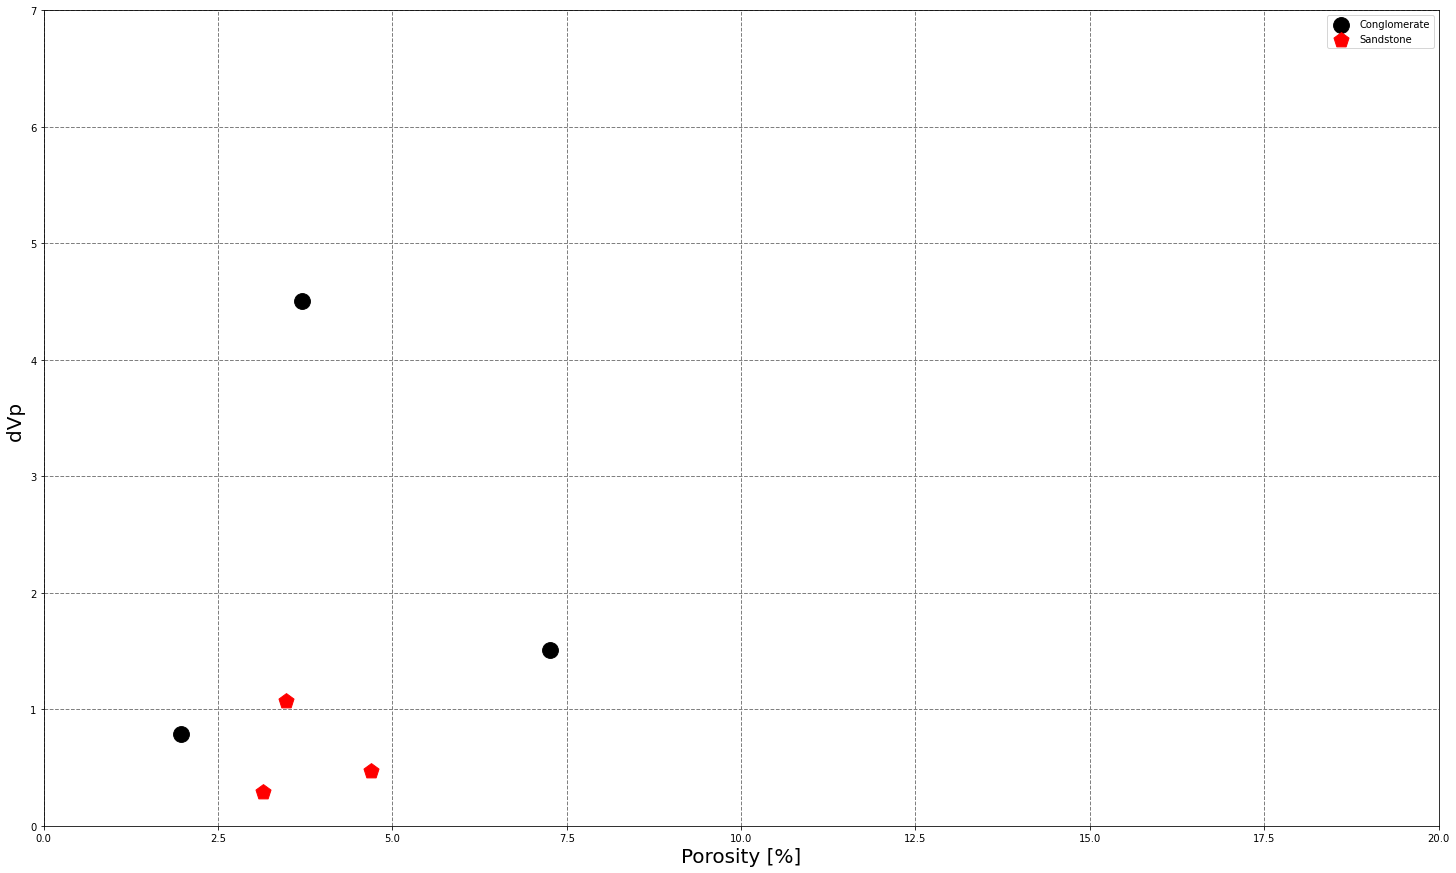

In [229]:


dVp_coal=df['dVp_q'].loc[df['lithology'] == 'Coal']
dVp_Shale=df['dVp_q'].loc[df['lithology'] == 'Shale']
dVp_Claystone=df['dVp_q'].loc[df['lithology'] == 'Claystone']
dVp_Conglomerate=df['dVp_q'].loc[df['lithology'] == 'Conglomerate']
dVp_Sandstone=df['dVp_q'].loc[df['lithology'] == 'Sandstone']

phi_coal=df['phi'].loc[df['lithology'] == 'Coal']
phi_Shale=df['phi'].loc[df['lithology'] == 'Shale']
phi_Claystone=df['phi'].loc[df['lithology'] == 'Claystone']
phi_Conglomerate=df['phi'].loc[df['lithology'] == 'Conglomerate']
phi_Sandstone=df['phi'].loc[df['lithology'] == 'Sandstone']

plt.figure(figsize=(25, 15))
poro=np.arange(start=0,stop=100,step=5)
#poro=np.arange(start=0,stop=0.4,step=0.01)


#my data
#phi=[2.38,2.51,1.97,3.14,3.47,2.58,5.27,8.04,4.45,7.08,12.98,7.26,3.70,8.60,8.70,5.64,7.03,6.28,2.83,7.82,6.60,8.09,9.21,5.32,4.69]
#d_tc_list=[3.99,4.53,4.18,2.8,3.24,3.88,3.71,5.81,4.51,3.5,2.51,2.88,2.8,5.75,5.51,3.65,5.97,6.06,6.75,4.91,5.41,5.8,5.6,3.63,3.0]


plt.scatter(phi_Conglomerate,dVp_Conglomerate,marker="o",label='Conglomerate', s=250,color='k')
plt.scatter(phi_Sandstone,dVp_Sandstone,marker="p",label='Sandstone', s=250,color='r')

#plt.plot(poro,TCeucken_FoS,label='Eucken-Maxwell Quartz',color='k')
#plt.plot(poro,TCeucken_Ss,label='Eucken-Maxwell Sandstone',color='r')

#plt.plot(poro,TCpim_Ss3,label='1 Cracks Ss',color='k')


plt.xlim([0,20])
plt.ylim(0,7)
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)
plt.ylabel("dVp ",fontsize=20)
plt.xlabel("Porosity [%]",fontsize=20) 
plt.legend()